<a href="https://colab.research.google.com/github/ariesharry/Data-Science/blob/main/imdb_reviews_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
training_size = 30000
vocabs_size = 10000
embedding_dim = 16
max_length = 200
trunc_type = 'post'
oov_tok = '<OOV>'

## Load the dataset of IMDB of 50K Reviews

In [ ]:
imdb_dataset = pd.read_csv('IMDB_Dataset.csv')
imdb_dataset.tail(5)

FileNotFoundError: ignored

## Cleaning Text

In [ ]:
def clean_text(text):
    """Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers."""
    text = text.lower()
    text = re.sub("-", " ", text)
    text = re.sub('"', " ", text)
    text = re.sub("\[.*?\]", "", text)
    text = re.sub("https?://\S+|www\.\S+", "", text)
    text = re.sub("<.*?>+", "", text)
    text = re.sub("\n", "", text)
    text = re.sub("\w*\d\w*", "", text)
    text = " ".join(filter(lambda x: x[0] != "@", text.split()))
    return text


imdb_dataset["review"] = imdb_dataset.review.apply(clean_text)
imdb_dataset["review"]

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's love in the time of money is a...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
imdb_dataset["sentiment"] = imdb_dataset["sentiment"].map({ 'negative' : 0, 'positive' : 1})

## Split Data into Train,Test

In [ ]:
training_data = imdb_dataset['review'][:training_size]
training_labels = imdb_dataset['sentiment'][:training_size]

validation_data = imdb_dataset['review'][training_size:]
validation_labels = imdb_dataset['sentiment'][training_size:]

## Build The Tokenizer

In [ ]:
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(training_data)

train_sequences = tokenizer.texts_to_sequences(training_data)
train_padded = pad_sequences(train_sequences,maxlen=max_length,truncating=trunc_type)

In [ ]:
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(validation_data)

val_sequences = tokenizer.texts_to_sequences(validation_data)
val_padded = pad_sequences(val_sequences,maxlen=max_length,truncating=trunc_type)

In [ ]:
training_pad = np.array(train_padded)
training_labels = np.array(training_labels)

validation_pad = np.array(val_padded)
validation_labels = np.array(training_labels)

## Build The Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocabs_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    training_pad,training_labels,
    validation_data=(validation_pad,validation_labels),
    epochs=10,
    verbose=2
)

model.fit(training_pad, training_labels, epochs=10, validation_data=(validation_pad, validation_labels), verbose=2)

Epoch 1/10


InvalidArgumentError: ignored

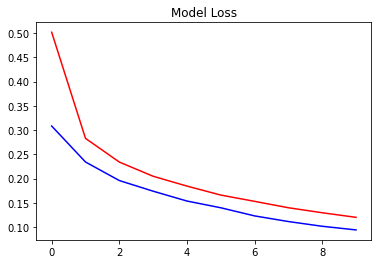

In [ ]:
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='blue')
plt.title('Model Loss')
plt.show()

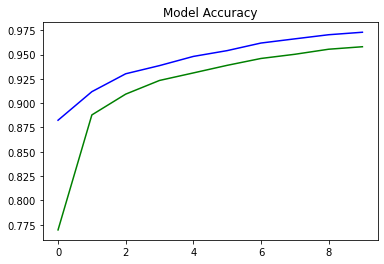

In [ ]:
plt.plot(history.history['accuracy'],color='green')
plt.plot(history.history['val_accuracy'],color='blue')
plt.title('Model Accuracy')
plt.show()

## Test The Model

In [ ]:
test_review = ['I love the film and ther characters are amazing','that film is bad with no great ideas']

tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(test_review)

sequence = tokenizer.texts_to_sequences(test_review)

test_padded = pad_sequences(sequence)

predictions = model.predict(test_padded)

predictions

array([[0.9947271 ],
       [0.02631786]], dtype=float32)